## Exercise 2

### Question 1

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
vig = pd.read_csv('vignettes.csv')
vig.head()

,self,alison,jane,moses,china,age
0,1,5,5,2,0,31
1,1,1,5,5,0,54
2,2,3,1,1,0,50
3,2,4,2,1,0,22
4,2,3,3,3,0,52


In [3]:
# Plot the distribution of responses separately for China and Mexico 
# using bar plots, where the vertical axis is the proportion of respondents.

China = vig.loc[vig['china'] == 1]
Mexico = vig.loc[vig['china'] != 1]

# China
China_ptable = China['self'].value_counts(normalize=True).reset_index()
China_ptable.columns = ['score', 'self']
China_ptable

,score,self
0,3,0.265018
1,1,0.250883
2,2,0.229682
3,4,0.155477
4,5,0.098940


In [4]:
# Mexico
Mexico_ptable = Mexico['self'].value_counts(normalize=True).reset_index()
Mexico_ptable.columns = ['score', 'self']
Mexico_ptable

,score,self
0,1,0.514056
1,2,0.291165
2,3,0.110442
3,5,0.060241
4,4,0.024096


[Text(0.5, 1.0, 'Mexico')]

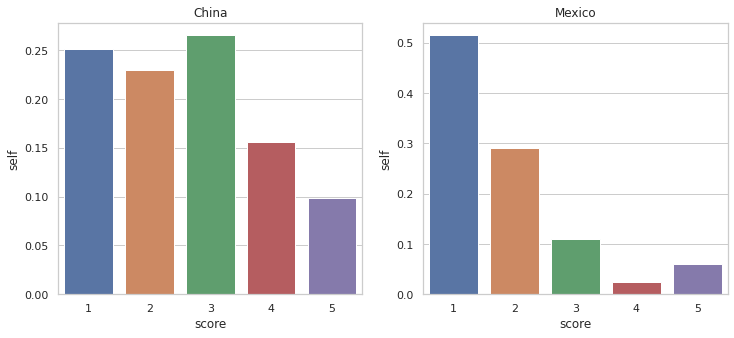

In [5]:
sns.set_theme(style="whitegrid")

fig, axs = plt.subplots(1, 2, figsize=(12, 5))

sns.barplot(data = China_ptable, x='score', y='self', ax=axs[0]).set(title='China')
sns.barplot(data = Mexico_ptable, x='score', y='self', ax=axs[1]).set(title='Mexico')

### Question 2

[Text(0.5, 1.0, "Distrubiton of Mexican respondents' age")]

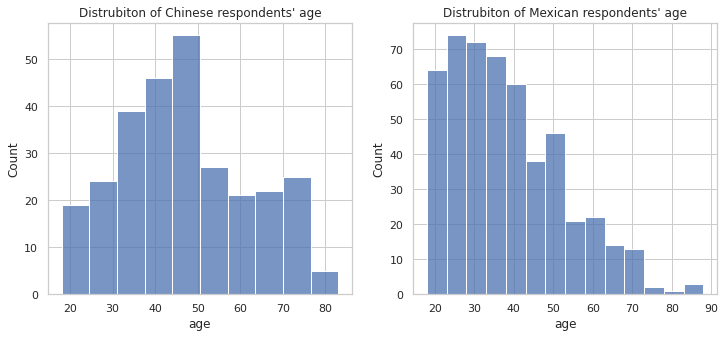

In [6]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(data=China, x='age', ax=axs[0]).set(title="Distrubiton of Chinese respondents' age")
sns.histplot(data=Mexico, x='age', ax=axs[1]).set(title="Distrubiton of Mexican respondents' age")

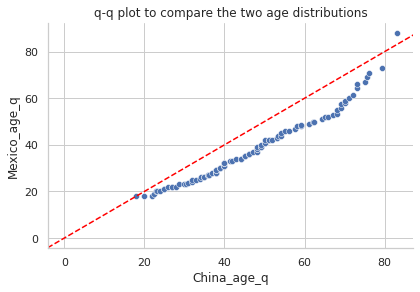

In [7]:
# Use a quantile–quantile plot to compare the two age distributions.
quantiles = np.linspace(0, 1, 101)

China_age_q = China['age'].quantile(quantiles)
Mexico_age_q = Mexico['age'].quantile(quantiles)

sns.relplot(
    x=China_age_q, y=Mexico_age_q, height=4, aspect=1.5
).set(xlabel='China_age_q', ylabel='Mexico_age_q', title='q-q plot to compare the two age distributions')

plt.gca().axline((0,0), slope=1, color='red', linestyle='--')

### Question 3

In [8]:
# Compute the proportion of respondents, again separately for China and Mexico,
# who rank themselves (according to the self-assessmentquestion) 
# as having less say in the government’s decisions than Moses

# China
len(China.loc[China['self'] < China['moses']]) / len(China)

0.5618374558303887

In [9]:
# Mexico
len(Mexico.loc[Mexico['self'] < Mexico['moses']]) / len(Mexico)

0.24899598393574296

### Question 4

In [10]:
China2 = China.loc[(China['moses'] <= China['jane']) & (China['jane'] <= China['alison'])]
Mexico2 = Mexico.loc[(Mexico['moses'] <= Mexico['jane']) & (Mexico['jane'] <= Mexico['alison'])]

In [11]:
# China

C_conditions = [
    China2['self'] < China2['moses'],
    (China2['self'] == China2['moses']) | (China2['self'] < China2['jane']),
    (China2['self'] == China2['jane']) | (China2['self'] < China2['alison']),
    China2['self'] >= China2['alison'],
]

C_variable = [1, 2, 3, 4]

In [12]:
China2['new respondet variable'] = np.select(C_conditions, C_variable)
China2.head()

/home/sudenur/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,self,alison,jane,moses,china,age,new respondet variable
499,1,5,5,5,1,45,1
501,1,5,5,5,1,42,1
502,1,3,3,3,1,57,1
506,4,5,4,1,1,51,3
508,1,5,5,5,1,27,1


In [13]:
# Mexico

M_conditions = [
    Mexico2['self'] < Mexico2['moses'],
    (Mexico2['self'] == Mexico2['moses']) | (Mexico2['self'] < Mexico2['jane']),
    (Mexico2['self'] == Mexico2['jane']) | (Mexico2['self'] < Mexico2['alison']),
    Mexico2['self'] >= Mexico2['alison'],
]

M_variable = [1, 2, 3, 4]

In [14]:
Mexico2['new respondet variable'] = np.select(M_conditions, M_variable)
Mexico2.head()

/home/sudenur/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,self,alison,jane,moses,china,age,new respondet variable
0,1,5,5,2,0,31,1
2,2,3,1,1,0,50,3
3,2,4,2,1,0,22,3
4,2,3,3,3,0,52,1
6,1,1,1,1,0,35,2


In [15]:
China2_ptable = China2['new respondet variable'].value_counts(normalize=True).reset_index()
China2_ptable.columns = ['score', 'new respondet variable']
China2_ptable

,score,new respondet variable
0,1,0.469880
1,2,0.295181
2,3,0.132530
3,4,0.102410


In [16]:
Mexico2_ptable = Mexico2['new respondet variable'].value_counts(normalize=True).reset_index()
Mexico2_ptable.columns = ['score', 'new respondet variable']
Mexico2_ptable

,score,new respondet variable
0,2,0.531722
1,4,0.175227
2,3,0.175227
3,1,0.117825


[Text(0.5, 1.0, 'Mexico'),
 Text(0, 0.5, 'proportion of new respondet variable')]

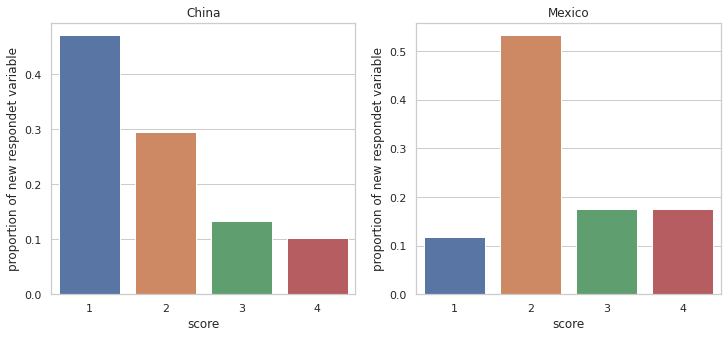

In [17]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

sns.barplot(
    data=China2_ptable, x='score', y='new respondet variable', ax=axs[0]
).set(title='China',ylabel='proportion of new respondet variable')

sns.barplot(
    data=Mexico2_ptable, x='score', y='new respondet variable', ax=axs[1]
).set(title='Mexico', ylabel='proportion of new respondet variable')

In [18]:
# to compare mean of new respondet variable with the mean of initial self variable

China2['new respondet variable'].mean(), Mexico2['new respondet variable'].mean()

(1.8674698795180722, 2.40785498489426)

### Question 5

In [19]:
# Answer the previous question separately for those 
# who are 40 years or older and those who are younger than 40 years.

# China

China2_u40 = China2[China2['age'] < 40]
China2_o40 = China2[China2['age'] >= 40]

China2_u40_p = China2_u40['new respondet variable'].value_counts(normalize=True).reset_index()
China2_o40_p = China2_o40['new respondet variable'].value_counts(normalize=True).reset_index()

China2_u40_p.columns = ['score', 'new respondet variable']
China2_o40_p.columns = ['score', 'new respondet variable']

In [20]:
# Mexico

Mexico2_u40 = Mexico2[Mexico2['age'] < 40]
Mexico2_o40 = Mexico2[Mexico2['age'] >= 40]

Mexico2_u40_p = Mexico2_u40['new respondet variable'].value_counts(normalize=True).reset_index()
Mexico2_o40_p = Mexico2_o40['new respondet variable'].value_counts(normalize=True).reset_index()

Mexico2_u40_p.columns = ['score', 'new respondet variable']
Mexico2_o40_p.columns = ['score', 'new respondet variable']


[Text(0.5, 1.0, 'China - over 40'),
 Text(0, 0.5, 'proportion of new respondet variable')]

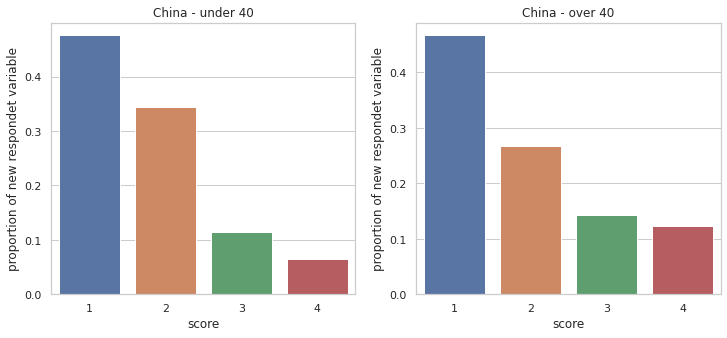

In [21]:
# China

fig, axs = plt.subplots(1, 2, figsize=(12, 5))

sns.barplot(
    data=China2_u40_p, x='score', y='new respondet variable', ax=axs[0]
).set(title='China - under 40',ylabel='proportion of new respondet variable')

sns.barplot(
    data=China2_o40_p, x='score', y='new respondet variable', ax=axs[1]
).set(title='China - over 40', ylabel='proportion of new respondet variable')

[Text(0.5, 1.0, 'Mexico - over 40'),
 Text(0, 0.5, 'proportion of new respondet variable')]

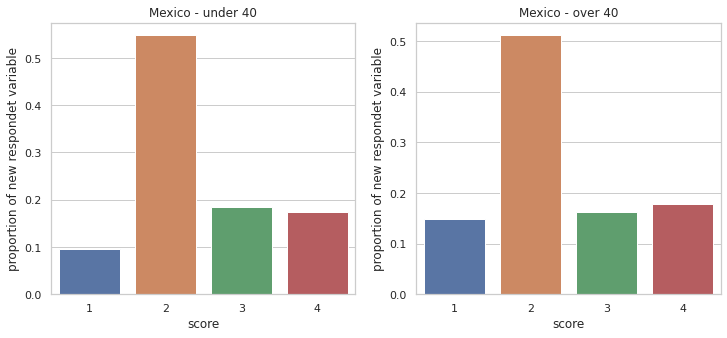

In [22]:
# Mexico

fig, axs = plt.subplots(1, 2, figsize=(12, 5))

sns.barplot(
    data=Mexico2_u40_p, x='score', y='new respondet variable', ax=axs[0]
).set(title='Mexico - under 40',ylabel='proportion of new respondet variable')

sns.barplot(
    data=Mexico2_o40_p, x='score', y='new respondet variable', ax=axs[1]
).set(title='Mexico - over 40', ylabel='proportion of new respondet variable')